In [1]:
# matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

In [2]:
# Merging Datasets 
df_mouse = pd.read_csv(mouse_drug_data_to_load)
df_clinical = pd.read_csv(clinical_trial_data_to_load) 
df = pd.merge(df_mouse, df_clinical, left_on="Mouse ID", right_on="Mouse ID", how="outer")

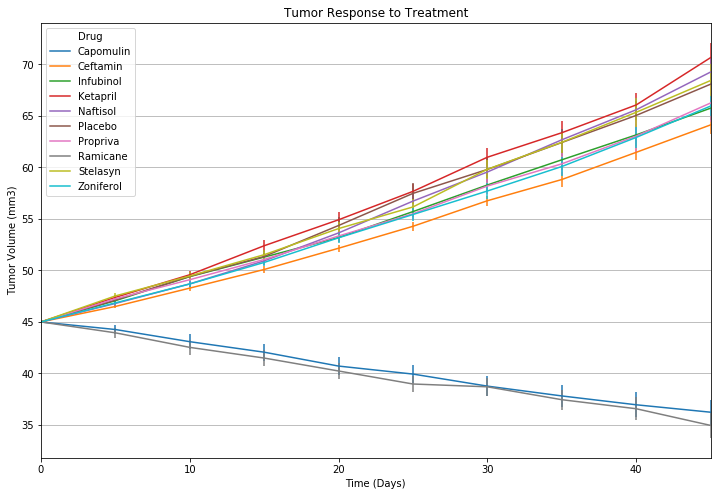

In [3]:
# Tumor Response to Treatment
df_tumor_mean = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean().unstack().transpose()
df_tumor_sem = df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem().unstack().transpose()

df_tumor_mean.plot(figsize=(12,8), 
                   style=['o-', '^--', 'x-.', 'D-','o-', '^--', 'x-.', 'D-', "o-", "D-"],
                   yerr = df_tumor_sem)
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks([0, 10, 20, 30, 40])
plt.grid(axis="y")
plt.savefig("Tumor Response to Treatment")
plt.show()



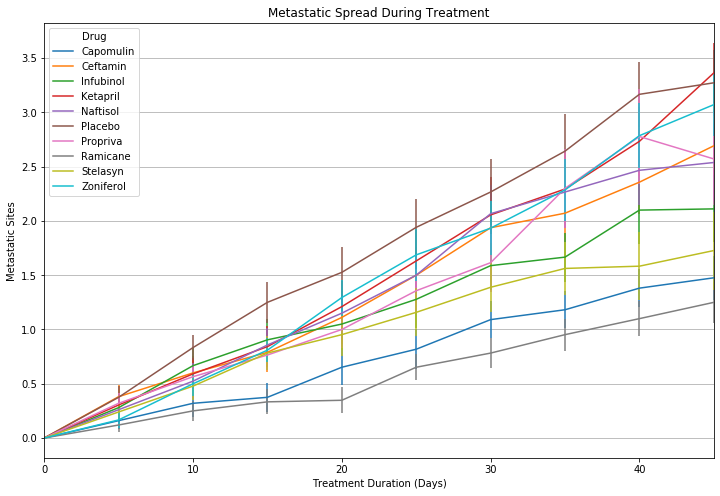

In [4]:
# Metastatic Response to Treatment
df_metastatic_mean = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean().unstack().transpose()
df_metastatic_sem = df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem().unstack().transpose()

df_metastatic_mean.plot(figsize=(12,8),
                        style=['o-', '^--', 'x-.', 'D-','o-', '^--', 'x-.', 'D-', "o-", "D-"],
                        yerr=df_metastatic_sem)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")
plt.xticks([0, 10, 20, 30, 40])
plt.grid(axis="y")
plt.savefig("Metastatic Spread During Treatment")
plt.show()

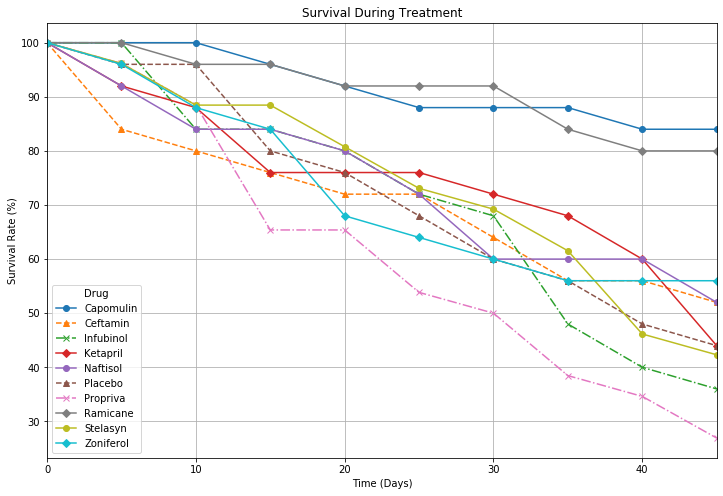

In [5]:
# Survival During Treatment
df_survival = df.groupby(["Drug", "Timepoint"])["Mouse ID"].count().unstack().transpose()
df_survival_rate = df_survival.divide(df_survival.iloc[0])*100

df_survival_rate.plot(figsize=(12,8),
                      style=['o-', '^--', 'x-.', 'D-','o-', '^--', 'x-.', 'D-', "o-", "D-"])
plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.xticks([0, 10, 20, 30, 40])
plt.grid()
plt.savefig("Survival During Treatment")
plt.show()

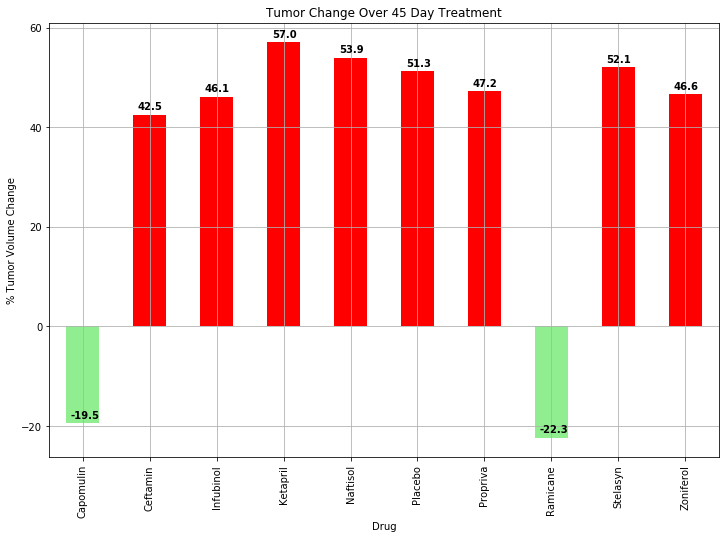

In [6]:
# Summary Bar Graph
df_tumor_mean
tumor_change_rate = df_tumor_mean.iloc[9].sub(df_tumor_mean.iloc[0]).divide(df_tumor_mean.iloc[0])*100 
my_color=np.where(tumor_change_rate>=0, 'red', 'lightgreen')

tumor_change_rate.plot(kind = "bar", figsize = (12,8), color = my_color)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")
plt.yticks([-20, 0, 20, 40, 60])
plt.grid()
for i, v in enumerate(tumor_change_rate):
    plt.text(i-0.175, v+1, str(round(v,1)), color='black', fontweight='bold')
plt.savefig("Tumor Change Over 45 Day Treatment")
plt.show()